# **Coffee Shop Analysis**

### **Batch Code - ANP-C8220**

### **Name - Mansi Sathe**

### **Trainer - Rajshri Thete**

## **TOOLS AND TECHNOLOGIES**

### **Programming Language - Python,Sql**

### **Liabraries - Pandas, Matplotlib,MYSQL connector**

### **IDE:Jupyter Notebook**

### **Source of Data - https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis**

## **OBJECTIVE**

### -To identify the most profitable product categories and stores. 

### -To understand customer preferences and tailor product offerings accordingly.
    
### -To optimize inventory management and pricing strategies.
    
### -To identify opportunities for growth and expansion. 

## Brief Description of Each Column

### Stores Table -

   store_id: The identifier for the store where the transaction took place
 
   store_location: The location of the store
 
### Products Table -

 product_id: The identifier for the product being sold.
 
 product_category: The category of the product.
 
 product_type: The type of tea.
 
 product_detail: Additional details about the product.
 
 Size: The size of the product(i.e. large,small,regular) 
 
### Transactions Table -

 transaction_id: A unique identifier for each transaction.
 
 transaction_date: The date of the transaction in the format DD-MM-YYYY.
 
 transaction_time: The time of the transaction in the format HH:MM:SS.
 
 transaction_qty: The quantity of the product sold in the transaction 
 
 unit_price: The price of a single unit of the product
 
 Total_Bill: The total amount of the transaction (which is the unit price multiplied by the transaction quantity).
 
 store_id: As a foreign key references form Stores table.
 
 product_id: As a foreign key references from Products table.

In [3]:
#It provides a way to interact with mysql database using python, enbling you to execute sql commanad
pip install mysql-connector-python


  Using cached mysql_connector_python-9.0.0-cp312-cp312-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
 

In [2]:
#importing liabraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

mysql.connector - This library is used to connect your Python application to a MySQL database. 
Pandas - Pandas is a powerful library for data manipulation and analysis.
Matplotlib - This is a widely used library for creating static, animated, and interactive visualizations in Python.

## Database Connection

In [6]:
#Establish connection with database
connection = mysql.connector.connect(
    user='root',
    password='Security@123',
    host='localhost',
    database='coffee_shop'
)

user='root': Specifies the username used to log in to MySQL, password='Security@123': The password associated with the root user to authenticate the connection,
host='localhost': Refers to the server where the MySQL database is hosted,database='coffee_shop': Specifies the particular database we want to interact with  

In [8]:
#Create cursor object
cursor=connection.cursor()

The line cursor = connection.cursor() creates a cursor object, which is used to interact with the MySQL database

In [12]:
# Execute a SQL command to fetching data of Table Stores
cursor.execute('select * from Stores')
Stores_data=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])
print(Stores_data)
print("The coffee shop has a total of 5 stores located in different cities.")

   store_id store_location
0         1       New York
1         2    Los Angeles
2         3        Astoria
3         4        Chicago
4         5        Houston
The coffee shop has a total of 5 stores located in different cities.


In [14]:
# Execute a SQL command to fetching data of Table Products
cursor.execute('select * from Products')
Products_data = pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])
print(Products_data)
print("The product catalog provides a comprehensive view of the coffee shop's offerings.")

    product_id product_category       product_type             product_detail  \
0            1     Coffee Beans      Organic Beans          Brazilian-Organic   
1            2     Coffee Beans  House blend beans   Our old time diner blend   
2            3     Coffee Beans     Espresso Beans             Espresso Roast   
3            4     Coffee Beans     Espresso Beans       Primo Espresso Roast   
4            5     Coffee Beans      Gourmet Beans     Columbian Medium Roast   
..         ...              ...                ...                        ...   
75          76          Branded           Clothing    I Need My Bean! T-shirt   
76          77          Branded         Housewares  I Need My Bean! Diner mug   
77          78          Branded         Housewares  I Need My Bean! Latte cup   
78          79         Flavours      Regular syrup            Chocolate syrup   
79          80           Coffee   Barista Espresso       Ouro Brasileiro shot   

           size  
0   Not D

In [16]:
# Execute a SQL command to fetching data of Table Transactions
cursor.execute('select * from Transactions')
Transactions_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(Transactions_data)
print("The transaction data provides a detailed view of the coffee shop's sales activity.")

    transaction_id transaction_date transaction_time  store_id  product_id  \
0                1       2023-06-01  0 days 11:33:29         1           1   
1                2       2023-06-02  0 days 12:02:45         2           1   
2                3       2023-05-17  0 days 12:54:42         3           7   
3                4       2023-05-22  0 days 16:59:40         3           7   
4                5       2023-02-17  0 days 17:44:50         1           4   
..             ...              ...              ...       ...         ...   
58              59       2023-04-17  0 days 08:12:52         4          54   
59              60       2023-04-20  0 days 09:09:20         4          50   
60              61       2023-05-01  0 days 18:09:43         5          72   
61              62       2023-05-18  0 days 17:06:58         4          43   
62              63       2023-05-29  0 days 07:52:34         3          42   

    transaction_qty unit_price total_bill  
0                 1

## Data Cleaning

In [19]:
#print first 5 rows in Stores table
print(Stores_data.head())
print("head() method used to display the first five rows of the Stores table")

   store_id store_location
0         1       New York
1         2    Los Angeles
2         3        Astoria
3         4        Chicago
4         5        Houston
head() method used to display the first five rows of the Stores table


In [21]:
#print first 5 rows in Products table
print(Products_data.head())
print("head() method used to display the first five rows of the Products table")

   product_id product_category       product_type            product_detail  \
0           1     Coffee Beans      Organic Beans         Brazilian-Organic   
1           2     Coffee Beans  House blend beans  Our old time diner blend   
2           3     Coffee Beans     Espresso Beans            Espresso Roast   
3           4     Coffee Beans     Espresso Beans      Primo Espresso Roast   
4           5     Coffee Beans      Gourmet Beans    Columbian Medium Roast   

          size  
0  Not Defined  
1  Not Defined  
2  Not defined  
3  Not defined  
4  Not Defined  
head() method used to display the first five rows of the Products table


In [23]:
#print first 5 rows in Transactions table
print(Transactions_data.head())
print("head() method used to display the first five rows of the Transactions table")

   transaction_id transaction_date transaction_time  store_id  product_id  \
0               1       2023-06-01  0 days 11:33:29         1           1   
1               2       2023-06-02  0 days 12:02:45         2           1   
2               3       2023-05-17  0 days 12:54:42         3           7   
3               4       2023-05-22  0 days 16:59:40         3           7   
4               5       2023-02-17  0 days 17:44:50         1           4   

   transaction_qty unit_price total_bill  
0                1       3.00       3.00  
1                4       3.00      12.00  
2                2       3.00       6.00  
3                6       3.00      18.00  
4                1       3.00       3.00  
head() method used to display the first five rows of the Transactions table


In [25]:
# To print the column names present in the Stores table.
print(Stores_data.columns)

Index(['store_id', 'store_location'], dtype='object')


In [27]:
# To print the column names present in the Products table.
print(Products_data.columns)

Index(['product_id', 'product_category', 'product_type', 'product_detail',
       'size'],
      dtype='object')


In [29]:
# To print the column names present in the Transactions table.
print(Transactions_data.columns)

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'product_id', 'transaction_qty', 'unit_price', 'total_bill'],
      dtype='object')


In [31]:
# Prints the shape i.e. the row size by column size of the dataset
Stores_data.shape


(5, 2)

shape is used to print the row size and column size of the Stores table. There are 5 rows and 2 columns

In [34]:
# Prints the shape i.e. the row size by column size of the dataset
Products_data.shape

(80, 5)

shape is used to print the row size and column size of the Products table. There are 80 rows and 5 columns

In [37]:
# Prints the shape i.e. the row size by column size of the dataset
Transactions_data.shape

(63, 8)

shape is used to print the row size and column size of the Transactions table. There are 63 rows and 8 columns

In [40]:
# Gives the details on the datatype present in each column
Stores_data.dtypes


store_id           int64
store_location    object
dtype: object

dtypes is used to gives the details of datatype of Stores table columns

In [43]:
# Gives the details on the datatype present in each column
Products_data.dtypes

product_id           int64
product_category    object
product_type        object
product_detail      object
size                object
dtype: object

dtypes is used to gives the details of datatype of Product table columns

In [50]:
# Gives the details on the datatype present in each column
Transactions_data.dtypes

transaction_id                int64
transaction_date             object
transaction_time    timedelta64[ns]
store_id                      int64
product_id                    int64
transaction_qty               int64
unit_price                   object
total_bill                   object
dtype: object

dtypes is used to gives the details of datatype of Transaction table columns

In [53]:
# Change the data type of the 'unit_price' column to float64
Transactions_data['unit_price'] = Transactions_data['unit_price'].astype('float64')
# Change the data type of the 'total_bill' column to float64
Transactions_data['total_bill'] = Transactions_data['total_bill'].astype('float64')
# check the datatypes in Transactions table
Transactions_data.dtypes

transaction_id                int64
transaction_date             object
transaction_time    timedelta64[ns]
store_id                      int64
product_id                    int64
transaction_qty               int64
unit_price                  float64
total_bill                  float64
dtype: object

unit_price and total_bill columns datatype converted into float datatype

In [56]:
missing_values=Stores_data.isnull().sum()
print(missing_values)

store_id          0
store_location    0
dtype: int64


In [58]:
missing_values=Products_data.isnull().sum()
print(missing_values)

product_id          0
product_category    0
product_type        0
product_detail      0
size                0
dtype: int64


In [60]:
missing_values=Transactions_data.isnull().sum()
print(missing_values)

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
product_id          0
transaction_qty     0
unit_price          0
total_bill          0
dtype: int64


## Data Visualization

### Which store has the highest total sales?

In [64]:
# SQL query to join Transactions and Stores based on store_id
query = """
SELECT s.store_location, t.total_bill
FROM Transactions t
JOIN Stores s ON t.store_id = s.store_id;
"""

# Execute the query
cursor.execute(query)

# Fetch the data into a pandas DataFrame
joined_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Display the first few rows to check the fetched data
print(joined_data.head())


  store_location total_bill
0       New York       3.00
1       New York       3.00
2       New York      17.50
3       New York       9.00
4       New York      14.00


In [66]:
# Check and convert 'total_bill' to numeric if necessary
joined_data['total_bill'] = pd.to_numeric(joined_data['total_bill'], errors='coerce')


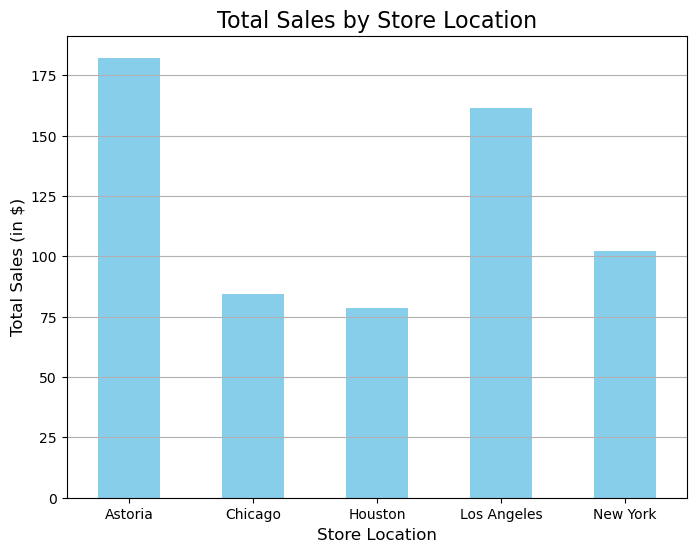

Insight:
Top Performer: Astoria clearly stands out as the top-performing store, with total sales significantly higher than the others.
Mid-Range Performance: Chicago, Houston, and New York exhibit moderate sales levels, suggesting consistent performance.
Lowest Sales: Los Angeles has the lowest total sales among the five stores.


In [68]:
# Group by 'store_location' and sum the 'total_bill'
sales_by_store = joined_data.groupby('store_location')['total_bill'].sum()

# Plotting the bar chart
plt.figure(figsize=(8,6))
sales_by_store.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Store Location', fontsize=16)
plt.xlabel('Store Location', fontsize=12)
plt.ylabel('Total Sales (in $)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()
print("Insight:\nTop Performer: Astoria clearly stands out as the top-performing store, with total sales significantly higher than the others.\nMid-Range Performance: Chicago, Houston, and New York exhibit moderate sales levels, suggesting consistent performance.\nLowest Sales: Los Angeles has the lowest total sales among the five stores.")

### Which product category has the highest total sales?

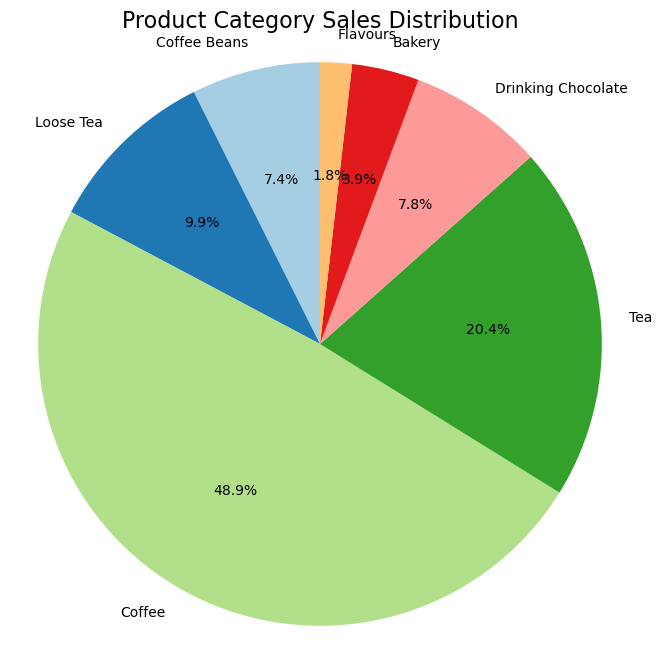

Insight:
Dominant Category: Coffee represents the most significant portion of sales, accounting for almost half (48.9%) of the total.
Secondary Categories: Tea and Coffee Beans are the next largest categories, with 20.4% and 9.9% respectively.
Smaller Categories: Flavours, Bakery, Drinking Chocolate, and Loose Tea make up the remaining 21.8% of sales.


In [71]:
# SQL query to retrieve data
query = """
  SELECT 
    p.product_category, 
    SUM(t.Total_Bill) AS total_sales
  FROM 
    Transactions t
    INNER JOIN Products p ON t.product_id = p.product_id
  GROUP BY 
    p.product_category

"""
# Execute the SQL query
cursor.execute(query)

# Fetch all the rows from the query
rows = cursor.fetchall()

# Extract the product categories and total sales
product_categories = [row[0] for row in rows]
total_sales = [row[1] for row in rows]

# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(total_sales, labels=product_categories, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Product Category Sales Distribution', fontsize=16)

# Ensure pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

print("Insight:\nDominant Category: Coffee represents the most significant portion of sales, accounting for almost half (48.9%) of the total.\nSecondary Categories: Tea and Coffee Beans are the next largest categories, with 20.4% and 9.9% respectively.\nSmaller Categories: Flavours, Bakery, Drinking Chocolate, and Loose Tea make up the remaining 21.8% of sales.")

### Which product category has the highest average transaction value?

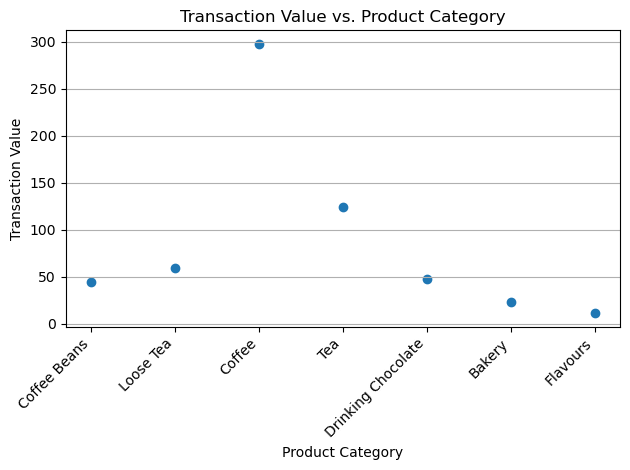

Insight:
Coffee stands out as the product category with the highest transaction value, reaching approximately 300 units. This indicates that coffee generates the most revenue among the product categories.
Tea follows next with a transaction value close to 150 units, suggesting it is another popular and high-revenue product category.
Drinking Chocolate and Loose Tea both have transaction values just above 50 units, placing them in a mid-tier range of revenue generation.
Coffee Beans, Bakery, and Flavours have the lowest transaction values, all below 50 units. These categories might not contribute significantly to overall sales compared to others.


In [74]:
# Execute the query
cursor.execute("""
  SELECT 
    p.product_category, 
    SUM(t.Total_Bill) AS total_transaction_value
  FROM 
    Products p 
    INNER JOIN Transactions t ON p.product_id = t.product_id
  GROUP BY 
    p.product_category;
""")

# Fetch the results and store them in a Pandas DataFrame
results = cursor.fetchall()
column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(results, columns=column_names)


# Create the scatter plot
plt.scatter(df['product_category'], df['total_transaction_value'])

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Transaction Value')
plt.title('Transaction Value vs. Product Category')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')  # rotate the x-axis labels for better readability
# Show the plot
plt.tight_layout()  # adjust the layout to fit the labels
# Show the plot
plt.show()
print("Insight:\nCoffee stands out as the product category with the highest transaction value, reaching approximately 300 units. This indicates that coffee generates the most revenue among the product categories.")
print("Tea follows next with a transaction value close to 150 units, suggesting it is another popular and high-revenue product category.\nDrinking Chocolate and Loose Tea both have transaction values just above 50 units, placing them in a mid-tier range of revenue generation.")
print("Coffee Beans, Bakery, and Flavours have the lowest transaction values, all below 50 units. These categories might not contribute significantly to overall sales compared to others.")

### Which products are most commonly sold in each store?

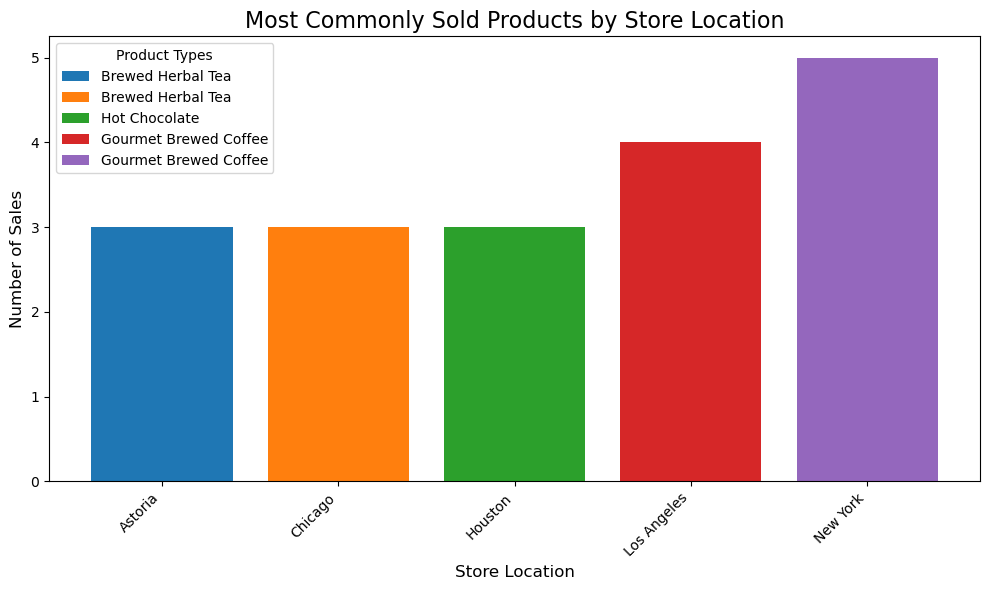

Insight:
Gourmet Brewed Coffee is particularly popular in Los Angeles and New York, with New York having the highest sales overall.
Brewed Herbal Tea is favored in Astoria and Chicago.
Hot Chocolate seems to be the most popular in Houston.


In [77]:
# Define the SQL query to join Transactions, Products, and Stores
query = """
SELECT 
    s.store_location, 
    p.product_type, 
    COUNT(t.product_id) AS sales_count
FROM 
    Transactions t
JOIN 
    Products p ON t.product_id = p.product_id
JOIN 
    Stores s ON t.store_id = s.store_id
GROUP BY 
    s.store_location, p.product_type
ORDER BY 
    s.store_location, sales_count DESC;
"""

# Execute the query
cursor.execute(query)

# Fetch the data into a pandas DataFrame
data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# For each store location, get the product with the maximum sales count
most_sold_products = data.loc[data.groupby('store_location')['sales_count'].idxmax()]

# Plotting the bar chart
plt.figure(figsize=(10,6))
for index, row in most_sold_products.iterrows():
    plt.bar(row['store_location'], row['sales_count'], label=row['product_type'])

# Add title and labels
plt.title('Most Commonly Sold Products by Store Location', fontsize=16)
plt.xlabel('Store Location', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add legend to show which product is most sold in each store location
plt.legend(title='Product Types')

plt.tight_layout()
plt.show()
print("Insight:\nGourmet Brewed Coffee is particularly popular in Los Angeles and New York, with New York having the highest sales overall.\nBrewed Herbal Tea is favored in Astoria and Chicago.\nHot Chocolate seems to be the most popular in Houston.")


### Which individual products have the highest sales? bar chart to display the top 5 products?

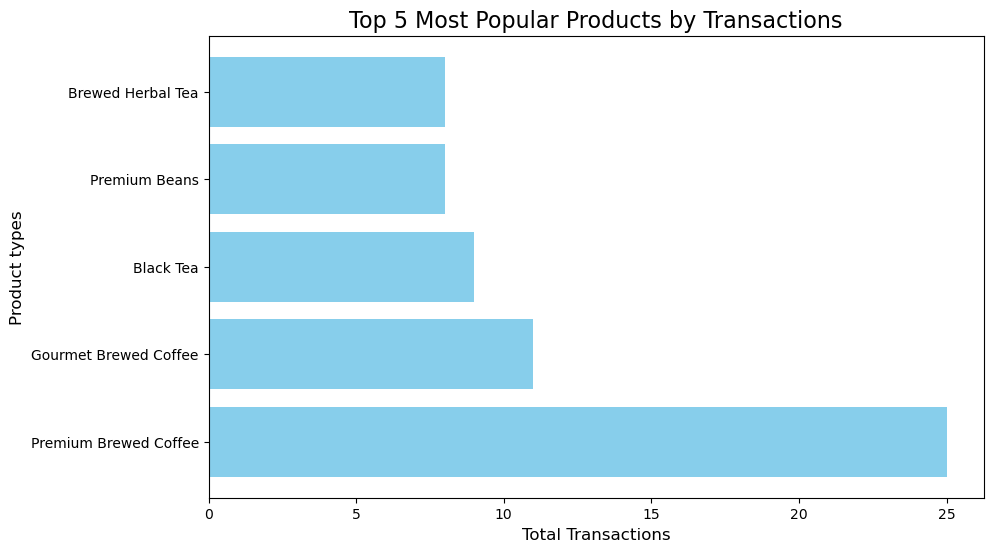

Insight:
Premium Brewed Coffee is the Most Popular: It has the highest sales and is clearly the favorite among customers.
Gourmet Brewed Coffee is Doing Well: Although it’s not as popular as the top two, it still has a solid place in the rankings.
Tea Products Are Also Popular: Brewed Herbal Tea and Black Tea are both in the top 5, showing that many customers enjoy tea-based drinks.
Premium Beans Are Less Popular: Even though it’s a premium product, it doesn’t sell as much as brewed coffee. This could mean customers prefer ready-to-drink coffee or specific types of brewed coffee.


In [80]:
query = """
SELECT 
    p.product_id, 
    p.product_type,
    SUM(t.transaction_qty) AS total_transactions
FROM 
    Transactions t
JOIN 
    Products p ON t.product_id = p.product_id
GROUP BY 
    p.product_id, p.product_type
ORDER BY 
    total_transactions DESC
LIMIT 7;
"""
cursor.execute(query)

# Fetch results
results = cursor.fetchall()

# Prepare data for visualization
products = [result[1] for result in results]  # Product details
transaction_counts = [result[2] for result in results]  # Total transaction counts

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(products, transaction_counts, color='skyblue')
plt.xlabel('Total Transactions', fontsize=12)
plt.ylabel('Product types', fontsize=12)
plt.title('Top 5 Most Popular Products by Transactions', fontsize=16)
plt.show()
print("Insight:\nPremium Brewed Coffee is the Most Popular: It has the highest sales and is clearly the favorite among customers.\nGourmet Brewed Coffee is Doing Well: Although it’s not as popular as the top two, it still has a solid place in the rankings.")
print("Tea Products Are Also Popular: Brewed Herbal Tea and Black Tea are both in the top 5, showing that many customers enjoy tea-based drinks.\nPremium Beans Are Less Popular: Even though it’s a premium product, it doesn’t sell as much as brewed coffee. This could mean customers prefer ready-to-drink coffee or specific types of brewed coffee.")

### Which month has the highest total sales?

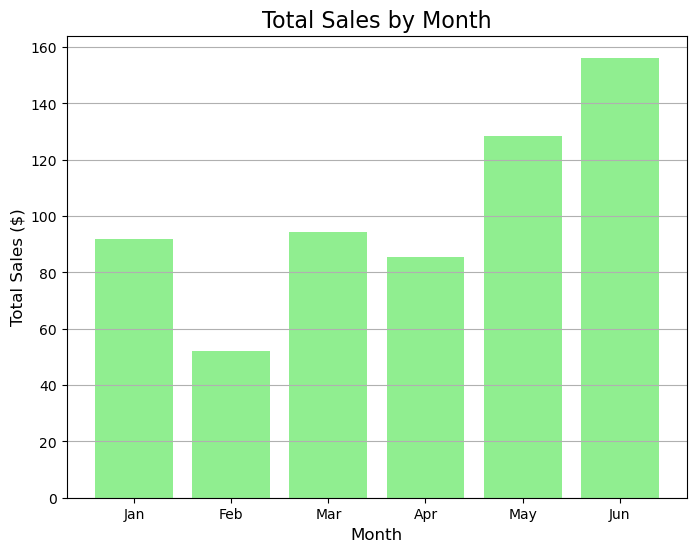

Insight:
The graph shows the total sales of a coffee shop over the months of January to June.
The highest sales were in June, followed by May and April.
The lowest sales were in February. Overall, the sales have increased from January to June.


In [83]:
query = """
SELECT 
    MONTH(transaction_date) AS month,  -- Extract month from transaction date
    SUM(total_bill) AS total_sales
FROM 
    Transactions
GROUP BY 
    month
ORDER BY 
    month;
"""
cursor.execute(query)

# Fetch results
results = cursor.fetchall()

# Prepare the data for visualization
months = [result[0] for result in results]  # Extract month
sales = [result[1] for result in results]   # Total sales

# Create a DataFrame for better visualization control
df = pd.DataFrame({
    'Month': months,
    'Total Sales': sales
})

# Create a bar chart for total sales per month
plt.figure(figsize=(8, 6))
plt.bar(df['Month'], df['Total Sales'], color='lightgreen')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Total Sales by Month', fontsize=16)
plt.grid(axis='y')
plt.xticks(ticks=range(1, 7), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.show()
print("Insight:\nThe graph shows the total sales of a coffee shop over the months of January to June.\nThe highest sales were in June, followed by May and April.\nThe lowest sales were in February. Overall, the sales have increased from January to June.")

### How does the total bill amount vary with transaction time?

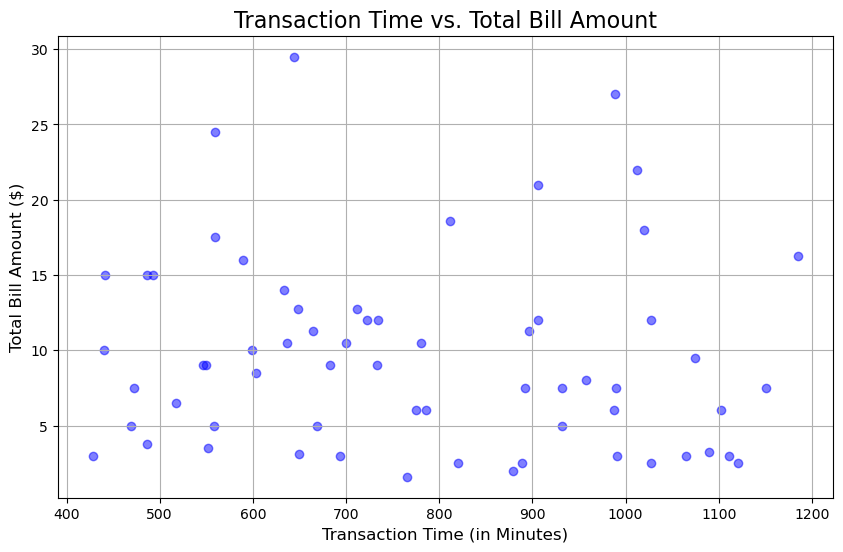

Insight:
The graph shows the relationship between the time of day a transaction occurs and the total amount spent.Each dot represents a single transaction.
You can see that there is no clear pattern between the time of day and the amount spent. This suggests that the time of day does not significantly affect the amount people spend at the coffee shop.


In [86]:
# SQL query to extract the transaction time and total bill
query = """
SELECT 
    TIME(transaction_time) AS transaction_time,  -- Extract transaction time
    total_bill  -- Total bill amount
FROM 
    Transactions;
"""
cursor.execute(query)

# Fetch results
results = cursor.fetchall()

# Prepare the data for visualization
transaction_times = [str(result[0]) for result in results]  # Convert time to string
total_bills = [result[1] for result in results]             # Extract total bill amounts

# Convert transaction times to minutes (from 'HH:MM:SS')
transaction_times_minutes = []
for t in transaction_times:
    h, m, s = map(int, t.split(':'))  # Split the time string into hours, minutes, and seconds
    total_minutes = h * 60 + m + s / 60  # Convert time to total minutes
    transaction_times_minutes.append(total_minutes)

# Create a DataFrame for better control over the data
df = pd.DataFrame({
    'Transaction Time (minutes)': transaction_times_minutes,
    'Total Bill Amount': total_bills
})

# Create a scatter plot for transaction time vs. total bill
plt.figure(figsize=(10, 6))
plt.scatter(df['Transaction Time (minutes)'], df['Total Bill Amount'], color='blue', alpha=0.5)
plt.xlabel('Transaction Time (in Minutes)', fontsize=12)
plt.ylabel('Total Bill Amount ($)', fontsize=12)
plt.title('Transaction Time vs. Total Bill Amount', fontsize=16)
plt.grid(True)
plt.show()
print("Insight:\nThe graph shows the relationship between the time of day a transaction occurs and the total amount spent.Each dot represents a single transaction.\nYou can see that there is no clear pattern between the time of day and the amount spent. This suggests that the time of day does not significantly affect the amount people spend at the coffee shop.")

## **CONCLUSION:**

### - Coffee is the dominant product category driving the majority of sales, followed by tea and coffee beans.

### - Astoria is the top-performing store, while Los Angeles has the lowest sales.

### - Premium Brewed Coffee is the most popular product, followed by tea-based drinks.

### - Coffee Beans are less popular than brewed coffee, suggesting a preference for ready-to-drink or specific brewed coffee types.

### - Product category performance varies across stores. For example, Gourmet Brewed Coffee is popular in Los Angeles and New York, while Brewed Herbal Tea       is favored in Astoria and Chicago.

## **RECOMMONDATIONS:**

### - Prioritize coffee product development and marketing to maintain its dominance.
### - Explore opportunities to increase sales of tea and coffee beans through targeted promotions or product bundling.
### - Focus on improving sales in Los Angeles by analyzing customer preferences and implementing tailored strategies.
### - Consider expanding product offerings in specific stores based on local demand and performance.
### - Implement data-driven inventory management to optimize stock levels and reduce waste.
### - Continuously monitor customer trends and preferences to adapt product offerings and marketing strategies.
### - Explore opportunities for cross-selling and upselling to increase average transaction value.